# Data Analysis Project
### Spring 2024
## Analyzing Insurance Auto Claims

<br>
<br>
<p align="center">
<img 
  src="./files/car_accident.png" 
  alt="Car Accident" 
  width="600"
  height="450"
/>
</p>

<br>

## Introduction
This semester we will be working with a dataset of auto claims filed by customers of an automobile insurance company located in the southwest and western regions of the United States.

Insurance companies depend on accurate pricing estimates to maintain profitability. Auto policies must be priced so that the insurance company makes a profit in the long run, given the costs of their customers' payouts for accident repairs, total loss car replacements, medical fees, and legal fees.

The executives at this insurance company have noticed declining profitability over the last several years and have hired you as a data science consultant to evaluate their claims data and make recommendations on pricing, customer behavior, and car insurance policy adjustments.

The objective of this project is to perform an exploratory data analysis on the `claims_df` dataset and produce an executive summary of your key insights and recommendations to the executive team at the insurance company.

Before you begin, take a moment to read through the following insurance company terms to familiarize yourself with the industry: [Auto Insurance Terms](https://www.iii.org/article/auto-insurance-jargon-buster "Auto Insurance Terms")

## Auto Claims Data

The `claims_df` data frame is loaded below and consists of 6,249 auto claims submitted by customers of the insurance company. The rows in this data frame represent a single claim with all of the associated features that are displayed in the table below.

### Data Definitions

| Variable                	| Definition                                                  	| Data Type 	|
|:------------------------- |:------------------------------------------------------------- |:------------- |
| customer_id             	| Customer identifier                                         	| Character 	|
| customer_state          	| State of residence                                          	| Factor    	|
| highest_education       	| Highest level of education                                  	| Factor    	|
| employment_status       	| Employment status at time of claim                          	| Factor    	|
| gender                  	| Gender                                                      	| Factor    	|
| income                  	| Income (US Dollars)                                         	| Numeric   	|
| residence_type          	| Customer residence type                                     	| Factor    	|
| marital_status          	| Marital status                                              	| Factor    	|
| sales_channel           	| Customer acquisition method                                 	| Factor    	|
| coverage                	| Auto policy tier                                            	| Factor    	|
| policy                  	| Auto policy type                                            	| Factor    	|
| vehicle_class           	| Vehicle type                                                	| Factor    	|
| vehicle_size            	| Vehicle size                                                	| Factor    	|
| monthly_premium         	| Customer monthly premium                                    	| Numeric   	|
| months_policy_active    	| Number of months policy has been active                     	| Numeric   	|
| months_since_last_claim 	| Number of months since last claim                           	| Numeric   	|
| current_claim_amount    	| Current claim amount                                        	| Numeric   	|
| total_claims            	| Total number of claims in customer history                  	| Numeric   	|
| total_claims_amount     	| Total amount of all claims in customer history              	| Numeric   	|
| customer_lifetime_value 	| Customer lifetime value (total revenue - total claims cost) 	| Numeric   	|

In [41]:
# Load data
library(tidyverse)

claims_df <- 
  readRDS(url('https://gmubusinessanalytics.netlify.app/data/claims_df.rds'))

In [42]:
# View data
claims_df

customer_id,customer_state,highest_education,employment_status,gender,income,residence_type,marital_status,sales_channel,coverage,policy,vehicle_class,vehicle_size,monthly_premium,months_policy_active,months_since_last_claim,current_claim_amount,total_claims,total_claims_amount,customer_lifetime_value
<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AA11235,Nevada,Bachelor,Medical Leave,Female,11167,Suburban,Married,Branch,Basic,Personal,Two-Door Car,Midsize,73,25,0,1383,1,1383,442
AA16582,Washington,Bachelor,Medical Leave,Male,14072,Suburban,Divorced,Agent,Basic,Personal,Four-Door Car,Midsize,71,27,13,1379,2,1992,-75
AA34092,California,Associate,Employed,Male,33635,Suburban,Married,Web,Extended,Personal,Luxury SUV,Midsize,240,32,1,2633,2,3671,4009
AA56476,Arizona,High School,Employed,Female,74454,Suburban,Single,Call Center,Basic,Corporate,Four-Door Car,Midsize,71,39,25,906,2,1541,1228
AA69265,Nevada,Bachelor,Employed,Female,60817,Suburban,Single,Web,Premium,Personal,Four-Door Car,Midsize,103,21,3,1095,2,1760,403
AA71604,Arizona,Master,Employed,Female,87560,Suburban,Married,Web,Extended,Personal,Two-Door Car,Midsize,98,17,4,1136,2,1828,-162
AA93585,California,Associate,Employed,Male,97024,Urban,Married,Branch,Premium,Personal,SUV,Midsize,177,33,0,1712,1,1712,4129
AB21519,California,Associate,Employed,Female,93272,Urban,Married,Branch,Extended,Personal,Four-Door Car,Midsize,95,26,3,1702,2,2585,-115
AB23825,California,Associate,Employed,Male,21509,Suburban,Single,Agent,Extended,Personal,Two-Door Car,Midsize,81,48,24,2058,2,3033,855


## Exploratory Data Analysis (80 Points)

Executives at this company have hired you as a data science consultant to evaluate their claims data and make recommendations on pricing, customer behavior, and car insurance policy adjustments.

You must think of **at least 8 relevant questions** that will provide evidence for your recommendations.

The goal of your analysis should be discovering which variables drive the differences between customers with large lifetime values and customers who cost the company more than they provide in revenue through monthly premiums.

Some of the many questions you can explore include:

- Are there types of customers, based on their policy or demographics, that are highly profitable?
- Do certain policies have a lower number of claims, leading to large profits?
- Are there "problem customers" which have a large number of claims?

You must answer each question and provide supporting data summaries with either a summary data frame (using `dplyr`/`tidyr`) or a plot (using `ggplot`) or both.

In total, you must have a minimum of 5 plots and 4 summary data frames for the exploratory data analysis section. Among the plots you produce, you must have at least 4 different types (ex. box plot, bar chart,
histogram, heat map, etc...)

Each question must be answered with **supporting evidence** from your tables and plots.

See the example question below.

### Sample Question
The sample below is from a previous semester where students analyzed a dataset, **employee_df**, with information on employees of a company and whether they decided to leave the company for another job.

The question, `R` code, and answer are examples of the correct style and language that you should use for your work.

### Question

**Is there a relationship between employees leaving the company and their current salary?**

**Answer**: Yes, the data indicates that employees who leave the company tend to have lower salaries when compared to employees who do not. Among the 237 employees that left the company, the average salary was \$76,625. This is over \$20,000 less than the average salary of employees who did not leave the company.

Among the employees *who did not leave the company*, only 10% have a salary that is less than or equal to \$60,000. When looking at employees who did leave the company, this increases to 34%.

### Supporting Table and Visualization

Note - the sample code and output below is an image, not code cells

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_table.jpg"
  width="650"
  height="auto"
/>
</p>

<br>
<br>
<br>

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_plot.jpg"
  width="650"
  height="auto"
/>
</p>


## Question 1

**Question**: Are there types of customers, based on their policy or demographics, that are highly profitable?


**Answer**: From the analysis below, we can infer that the male customers who are employed, having a special policy, with highest education as assosciates, belonging to a rural area and divorced are highly profitable with an average profit of 3034. 

## Supporting Analysis

In [43]:
# This code adjusts the figure output size in the notebook
options(repr.plot.width=11, repr.plot.height=8)

In [44]:
# Define profitability as the customer lifetime value
claims_df$profitability <- claims_df$customer_lifetime_value


customer_type <- claims_df %>%
  group_by(policy, highest_education, employment_status, gender, residence_type, marital_status) %>%
  summarise(avg_profitability = mean(profitability))
  

# Highly profitable customers
highly_profitable_cx <- customer_type %>%
  arrange(avg_profitability)

# Adjust options to display all columns
options(width = 120)

head(highly_profitable_cx)


`summarise()` has grouped output by 'policy', 'highest_education',
'employment_status', 'gender', 'residence_type'. You can override using the
`.groups` argument.
New names:
• `` -> `...1`


policy,highest_education,employment_status,gender,residence_type,marital_status,avg_profitability
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
Special,Associate,Employed,Male,Rural,Divorced,-3034
Personal,Bachelor,Medical Leave,Male,Rural,Divorced,-2610
Special,Associate,Disabled,Male,Urban,Married,-2432
Personal,Doctoral,Disabled,Female,Urban,Married,-2088
Special,Doctoral,Employed,Male,Suburban,Married,-2065
Corporate,Associate,Retired,Male,Suburban,Single,-1933


## Question 2


**Question**: Do certain policies have a lower number of claims, leading to large profits?



**Answer**: From the below summary and the graphs, it appears that Special policies have a higher average number of claims (2.433460) compared to Corporate (2.390813) and Personal (2.389652) policies. However, despite having a higher number of claims, Special policies have smaller profits (745.9582) compared to Corporate (951.3238) and Personal (923.6647) policies.

Therefore, based on the provided results, it does not seem that certain policies with lower numbers of claims necessarily lead to larger profits. In fact, in this case, despite having a lower number of claims, Personal policies result in smaller profits compared to Corporate policies.


## Supporting Analysis



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




     policy avg_claims avg_profit
1 Corporate   2.390813   951.3238
2  Personal   2.389652   923.6647
3   Special   2.433460   745.9582


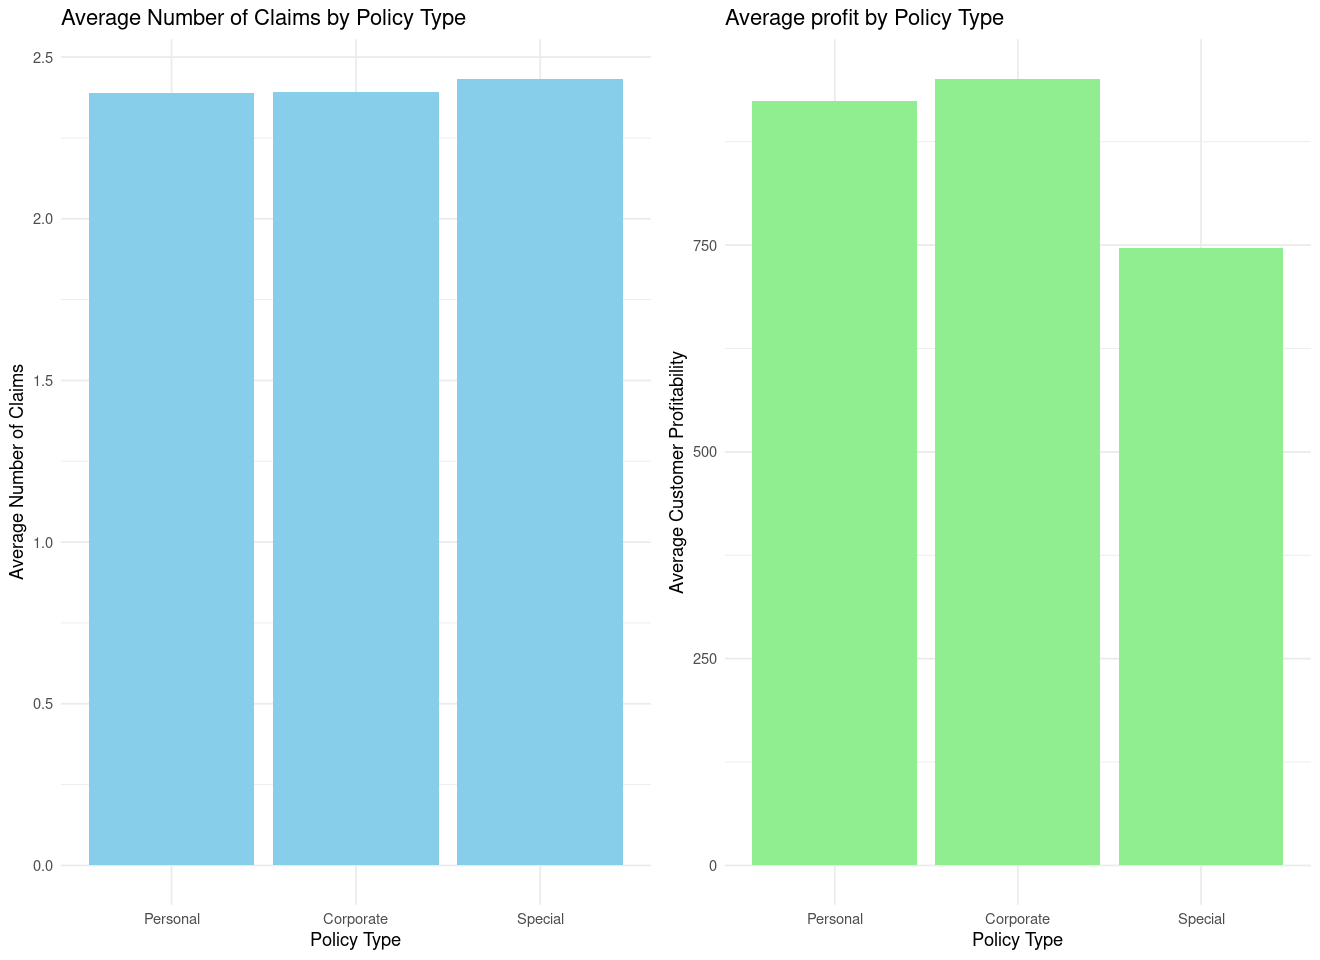

In [45]:
library(ggplot2)
library(gridExtra)

# Average number of claims for each policy type
policy_claims <- claims_df %>%
  group_by(policy) %>%
  summarise(avg_claims = mean(total_claims))

# Calculating profitability for each policy type
profitability <- claims_df %>%
  group_by(policy) %>%
  summarise(avg_profit = mean(customer_lifetime_value))

policy_comparison <- merge(policy_claims, profitability, by = "policy")
print(policy_comparison)

# Bar plot for average number of claims by policy type
claims_plot <- ggplot(policy_claims, aes(x = policy, y = avg_claims)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(x = "Policy Type", y = "Average Number of Claims", 
       title = "Average Number of Claims by Policy Type") +
  theme_minimal()

# Bar plot for average profit by policy type
profit_plot <- ggplot(profitability, aes(x = policy, y = avg_profit)) +
  geom_bar(stat = "identity", fill = "lightgreen") +
  labs(x = "Policy Type", y = "Average Customer Profitability", 
       title = "Average profit by Policy Type") +
  theme_minimal()

grid.arrange(claims_plot, profit_plot, ncol = 2)


## Question 3


**Question**: Are there "problem customers" which have a large number of claims?



**Answer**: From the below summary, it looks like the customers BM28359, IX60436, AH53588 are the top three potential 'problem customers' since they have a large number of claims and the least lifetime values who contribute least towards the profitability of the insurance company


## Supporting Analysis


In [46]:
#"Problem customers" with large number of claims and low CLV
problem_customers <- claims_df %>%
  arrange(desc(total_claims), customer_lifetime_value) %>%
  select(customer_id, total_claims, customer_lifetime_value) %>%
  head(10)

print(problem_customers)

# A tibble: 10 × 3
   customer_id total_claims customer_lifetime_value
   <chr>              <dbl>                   <dbl>
 1 BM28359                4                   -4285
 2 IX60436                4                   -3911
 3 AH53588                4                   -3890
 4 PI92163                4                   -3850
 5 NT21324                4                   -3772
 6 BA75404                4                   -3692
 7 IC80537                4                   -3627
 8 LG19551                4                   -3528
 9 CN91738                4                   -3490
10 JW33458                4                   -3465


## Question 4


**Question**: Is there a relationship between the type of coverage (e.g., Basic, Extended, Premium) and the customer lifetime value? 



**Answer**: 
Based on the result from the analysis and the box plot, Customers with "Premium" coverage have the highest average customer lifetime value (2879), followed by "Extended" coverage (1539), and then "Basic" coverage (326). This suggests that customers with higher coverage tend to have higher lifetime values. So, there appears to be a relationship between the type of coverage and customer lifetime value. Premium coverage tends to be associated with higher average and median CLV compared to Basic and Extended coverage



## Supporting Analysis


# A tibble: 3 × 5
  coverage avg_clv median_clv min_clv max_clv
  <fct>      <dbl>      <dbl>   <dbl>   <dbl>
1 Basic       326.       109    -4285   10132
2 Extended   1539.      1269    -2767   12185
3 Premium    2879.      2220.   -2038   16465


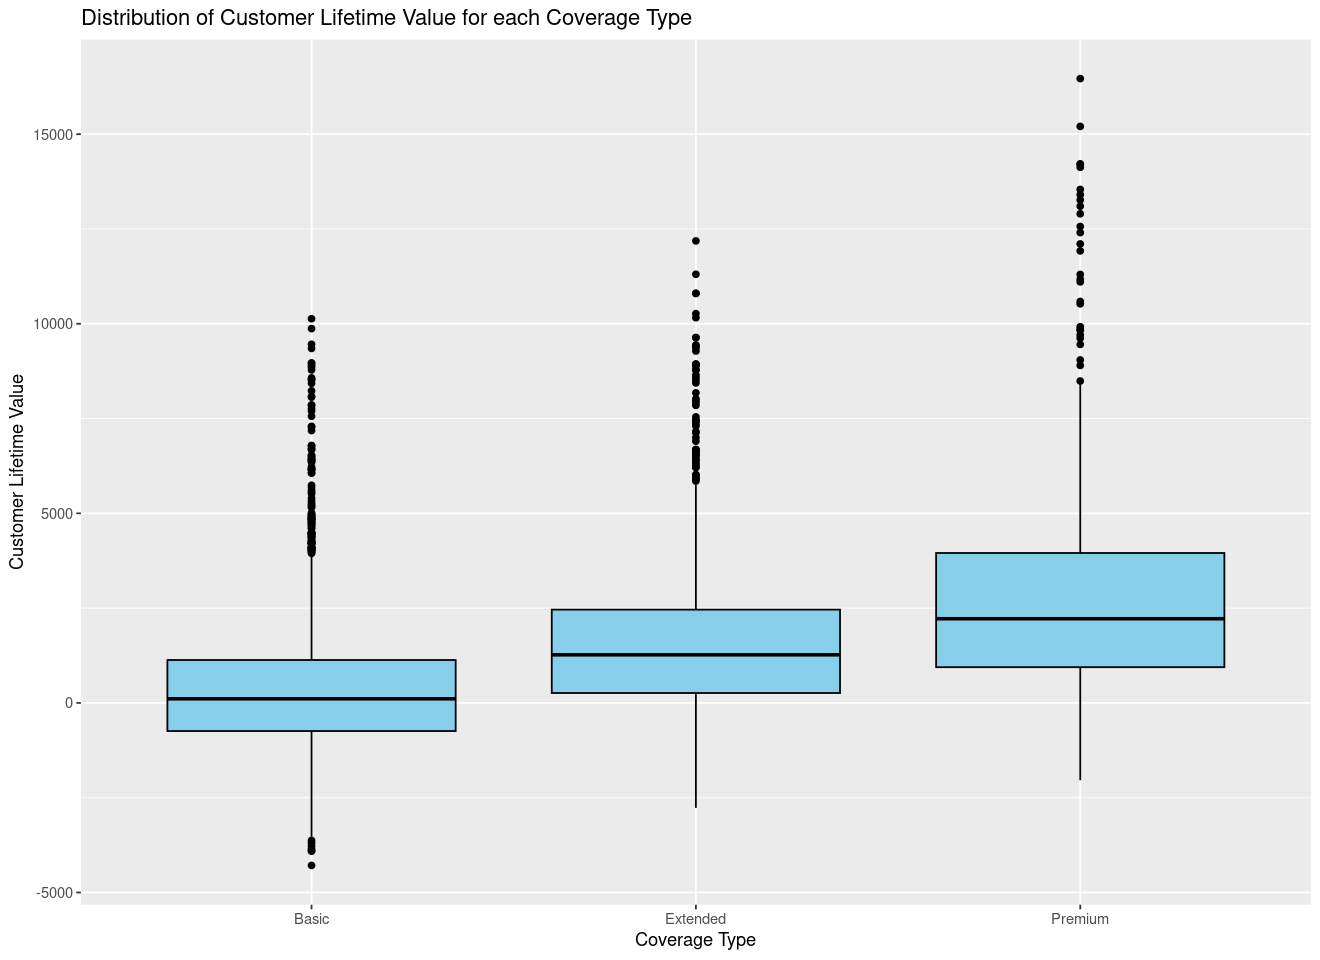

In [47]:
# Summary statistics for each coverage type	
summary_stats <- claims_df %>%
  group_by(coverage) %>%
  summarise(avg_clv = mean(customer_lifetime_value),
			median_clv = median(customer_lifetime_value),
		    min_clv = min(customer_lifetime_value),
			max_clv = max(customer_lifetime_value))

# Plotting boxplot to visualize the distribution of customer lifetime value by coverage type
ggplot(claims_df, aes(x = coverage, y = customer_lifetime_value)) +
  geom_boxplot(fill = "skyblue", color = "black") +
  labs(x = "Coverage Type", y = "Customer Lifetime Value") +
  ggtitle("Distribution of Customer Lifetime Value for each Coverage Type")

# Print summary statistics
print(summary_stats)



## Question 5


**Question**: How do different sales channels affect the profitability in terms of CLV and total claims amount?



**Answer**: From the below analysis it can be concluded that the customers who have purchased the insurance policies through an agent tend to yield a higher CLV to the company, resulting in higher profitability. Similarly, though there is no significant difference in the average total amount claimed for each sales channel, customers who have purchased the insurance policies through call centres tend to claim a slightly higher amount on average.  


## Supporting Analysis


sales_channel,avg_CLV,avg_total_claims_amount
<fct>,<dbl>,<dbl>
Agent,969.9640,2736.581
Branch,888.0265,2753.490
Call Center,895.6658,2755.466
Web,899.2386,2735.243


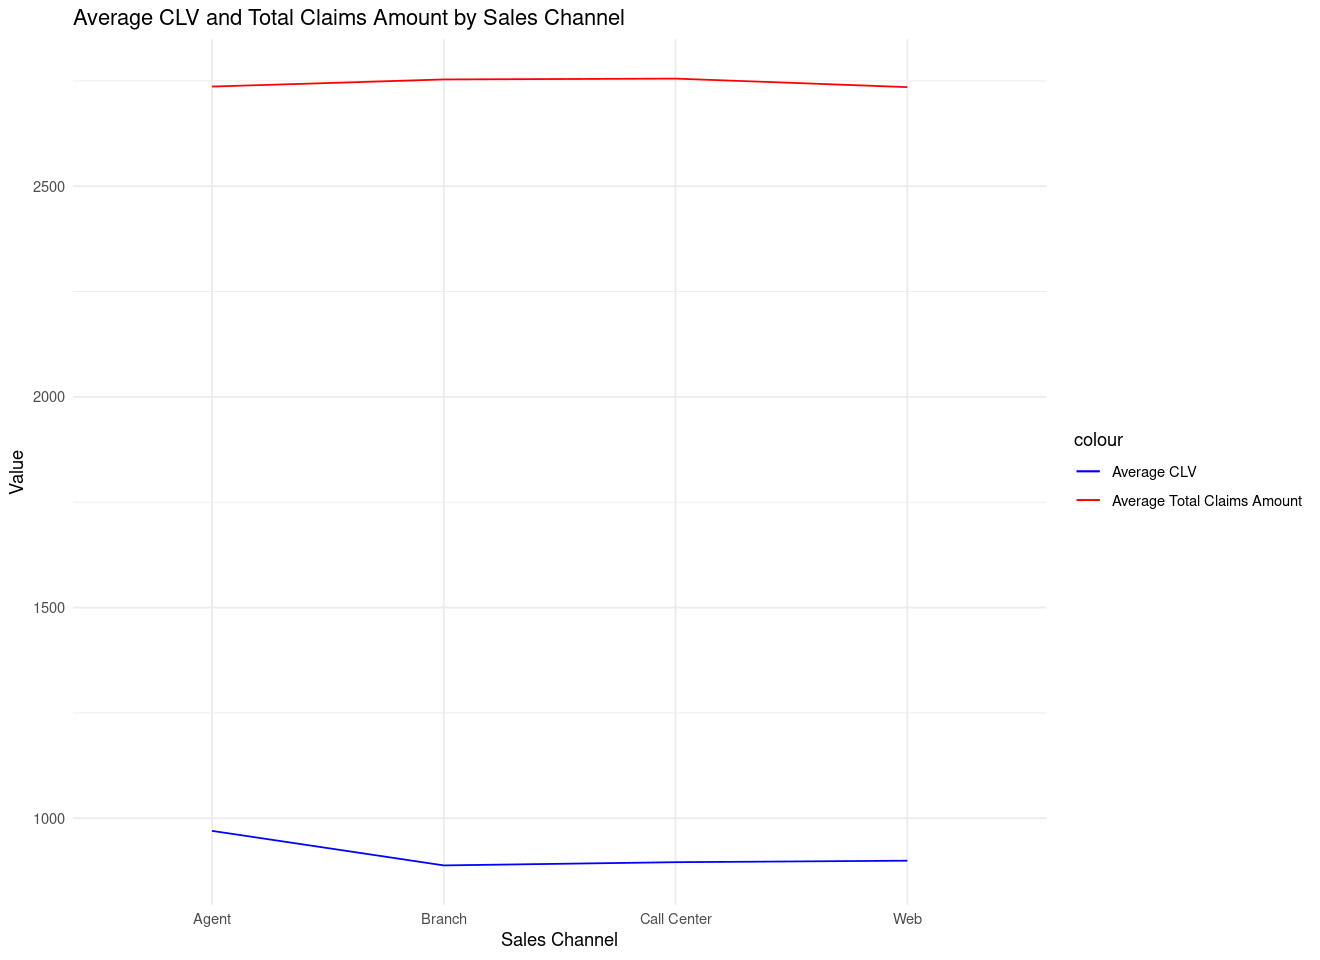

In [48]:
library(dplyr)
# Group data by sales channel and calculate average CLV and total claims amount
sales_channel_summary <- claims_df %>%
  group_by(sales_channel) %>%
  summarise(avg_CLV = mean(customer_lifetime_value),
            avg_total_claims_amount = mean(total_claims_amount))
sales_channel_summary

# Line plot for average CLV and average total claims amount by sales channel
ggplot(sales_channel_summary, aes(x = sales_channel)) +
  geom_line(aes(y = avg_CLV, color = "Average CLV", group = 1)) +
  geom_line(aes(y = avg_total_claims_amount, color = "Average Total Claims Amount", group = 1)) +
  labs(title = "Average CLV and Total Claims Amount by Sales Channel",
       x = "Sales Channel",
       y = "Value") +
  scale_color_manual(values = c("blue", "red"), 
                     labels = c("Average CLV", "Average Total Claims Amount")) +
  theme_minimal()


## Question 6


**Question**: What is the impact of vehicle class and size on customer lifetime value? Are customers with luxury vehicles more profitable to the company in the long term compared to those with economy vehicles?



**Answer**: From the below graph it is clear that, customers with midsize luxury SUVs have the highest average CLV followed by customers with small luxury cars.So we can conclude that customers with luxury vehicles are more profitable to the company in the long term compared to those with economy vehicles. 


## Supporting Analysis



`summarise()` has grouped output by 'vehicle_class'. You can override using the `.groups` argument.
New names:
• `` -> `...1`


vehicle_class,vehicle_size,avg_clv
<fct>,<fct>,<dbl>
Two-Door Car,Small,329.7684
Two-Door Car,Midsize,242.6279
Two-Door Car,Large,312.3309
Four-Door Car,Small,227.7277
Four-Door Car,Midsize,276.9256
Four-Door Car,Large,323.9313
Sports Car,Small,2316.5962
Sports Car,Midsize,2158.8252
Sports Car,Large,1937.1351


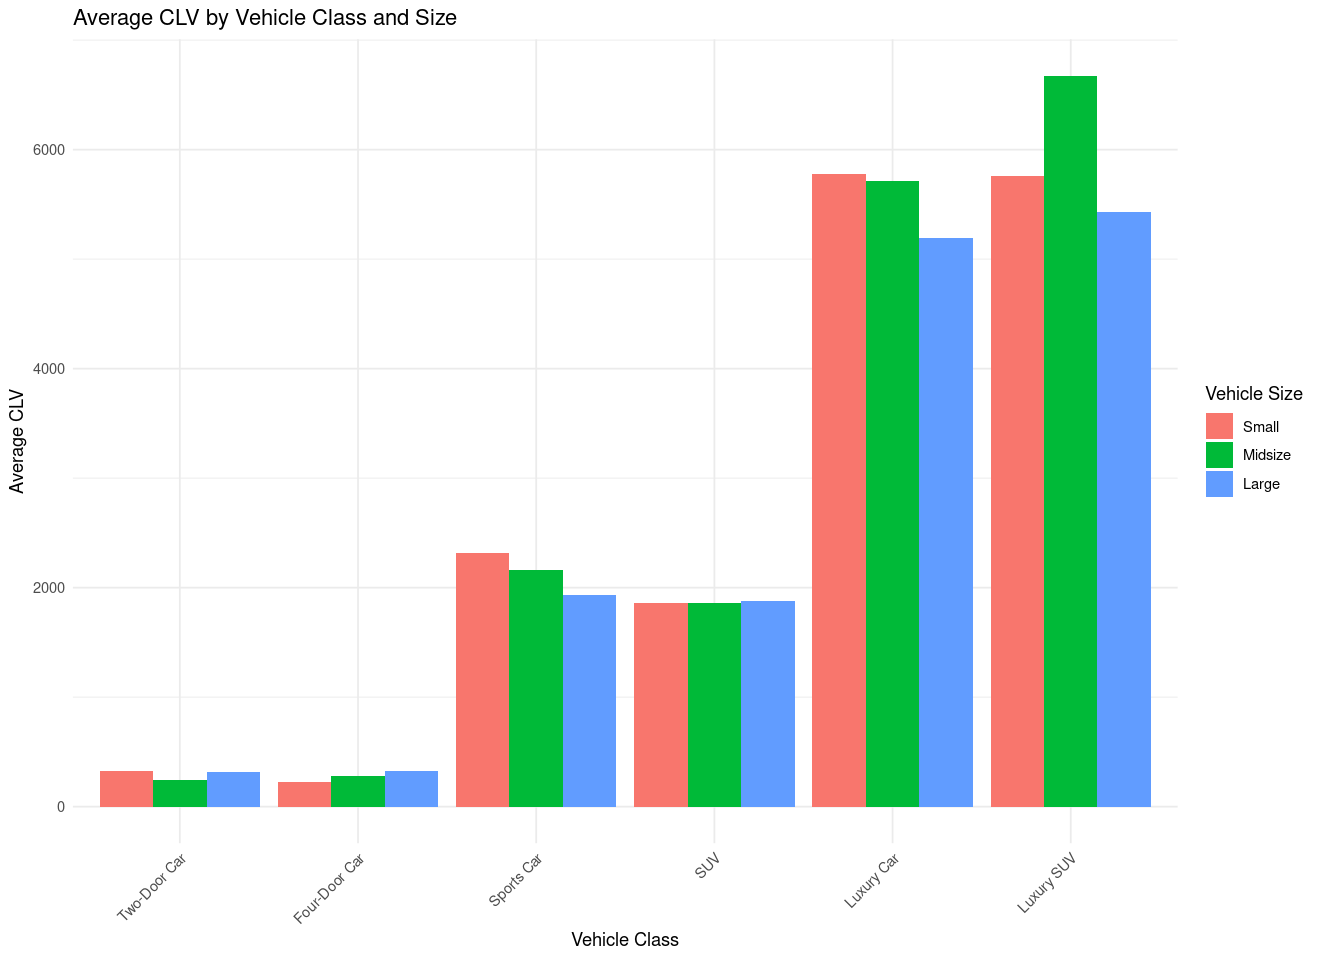

In [49]:
# Group by vehicle class and size, calculate average CLV
clv_summary <- claims_df %>%
  group_by(vehicle_class, vehicle_size) %>%
  summarise(avg_clv = mean(customer_lifetime_value))

clv_summary

ggplot(clv_summary, aes(x = vehicle_class, y = avg_clv, fill = vehicle_size)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Average CLV by Vehicle Class and Size",
       x = "Vehicle Class",
       y = "Average CLV",
       fill = "Vehicle Size") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


## Question 7


**Question**: What is the average monthly premium for customers with high CLV compared to those with low CLV?



**Answer**: The average monthly premium for customers with a high lifetime value is 110 and the average monthly premium for customers with a low lifetime value is 77.8. So, a higher monthly premium value yeilds a higher CLV, thus resulting in the profitability of the company. 


## Supporting Analysis


# A tibble: 2 × 2
  clv_group avg_monthly_premium
  <chr>                   <dbl>
1 High CLV                110. 
2 Low CLV                  77.8


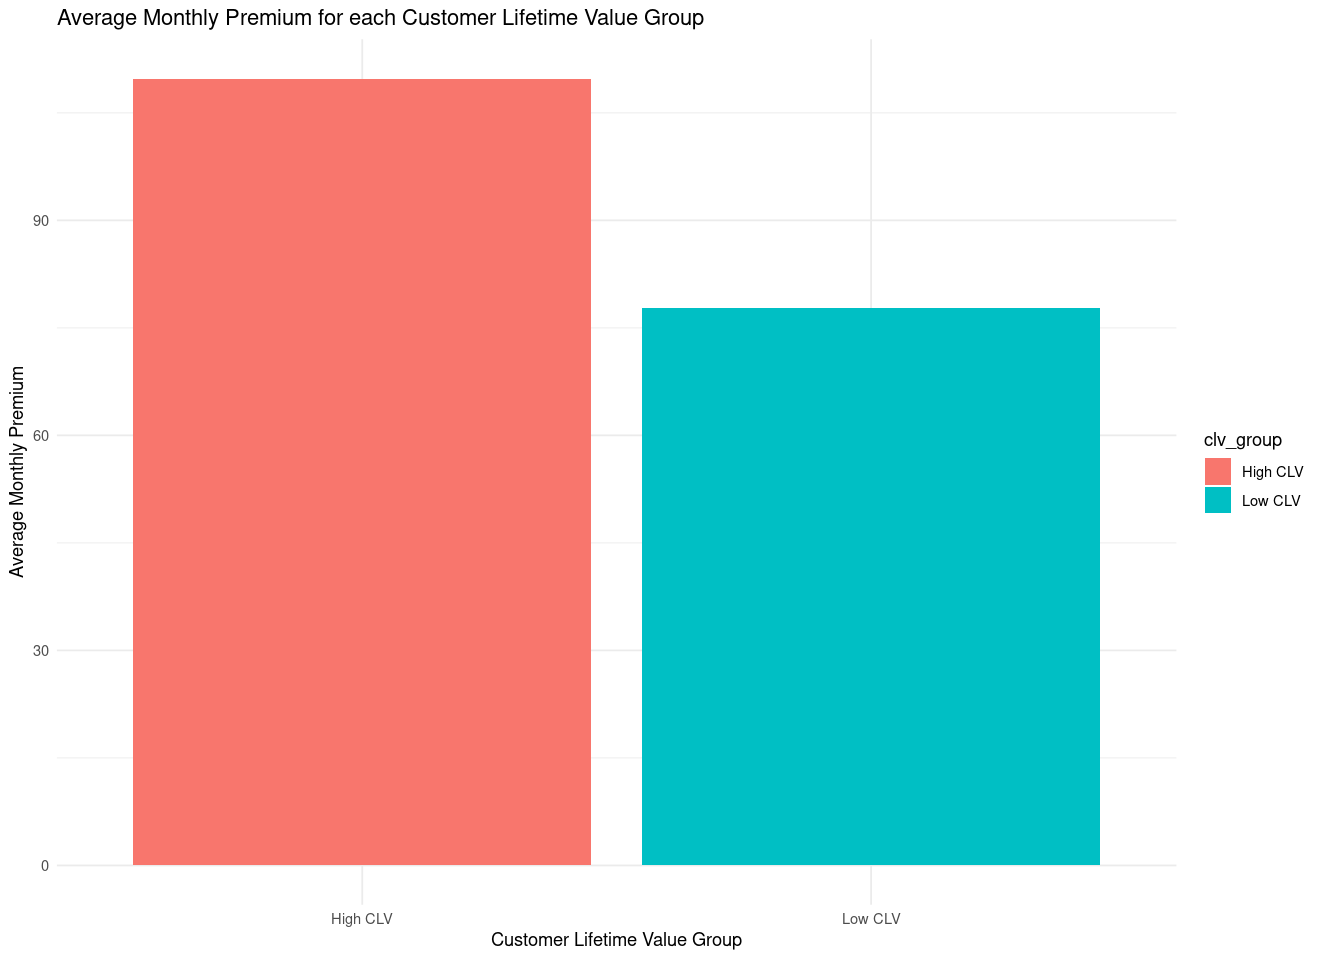

In [50]:
# Classifying customers as high or low CLV
claims_df <- claims_df %>%
  mutate(clv_group = ifelse(customer_lifetime_value > median(claims_df$customer_lifetime_value), "High CLV", "Low CLV"))

# Average monthly premium for each CLV group
monthly_premium <- claims_df %>%
  group_by(clv_group) %>%
  summarise(avg_monthly_premium = mean(monthly_premium))

print(monthly_premium)

ggplot(monthly_premium, aes(x = clv_group, y = avg_monthly_premium, fill = clv_group)) +
  geom_bar(stat = "identity") +
  labs(title = "Average Monthly Premium for each Customer Lifetime Value Group",
       x = "Customer Lifetime Value Group",
       y = "Average Monthly Premium") +
  theme_minimal()

## Question 8


**Question**: Do customers with high CLV tend to make more or fewer claims compared to those with low CLV?

**Answer**: Though there is no significant difference, the customers with low CLVs tend to make more number of claims when compared to the those with high CLVs. 


## Supporting Analysis


# A tibble: 2 × 2
  clv_group avg_claims
  <chr>          <dbl>
1 High CLV        2.23
2 Low CLV         2.56


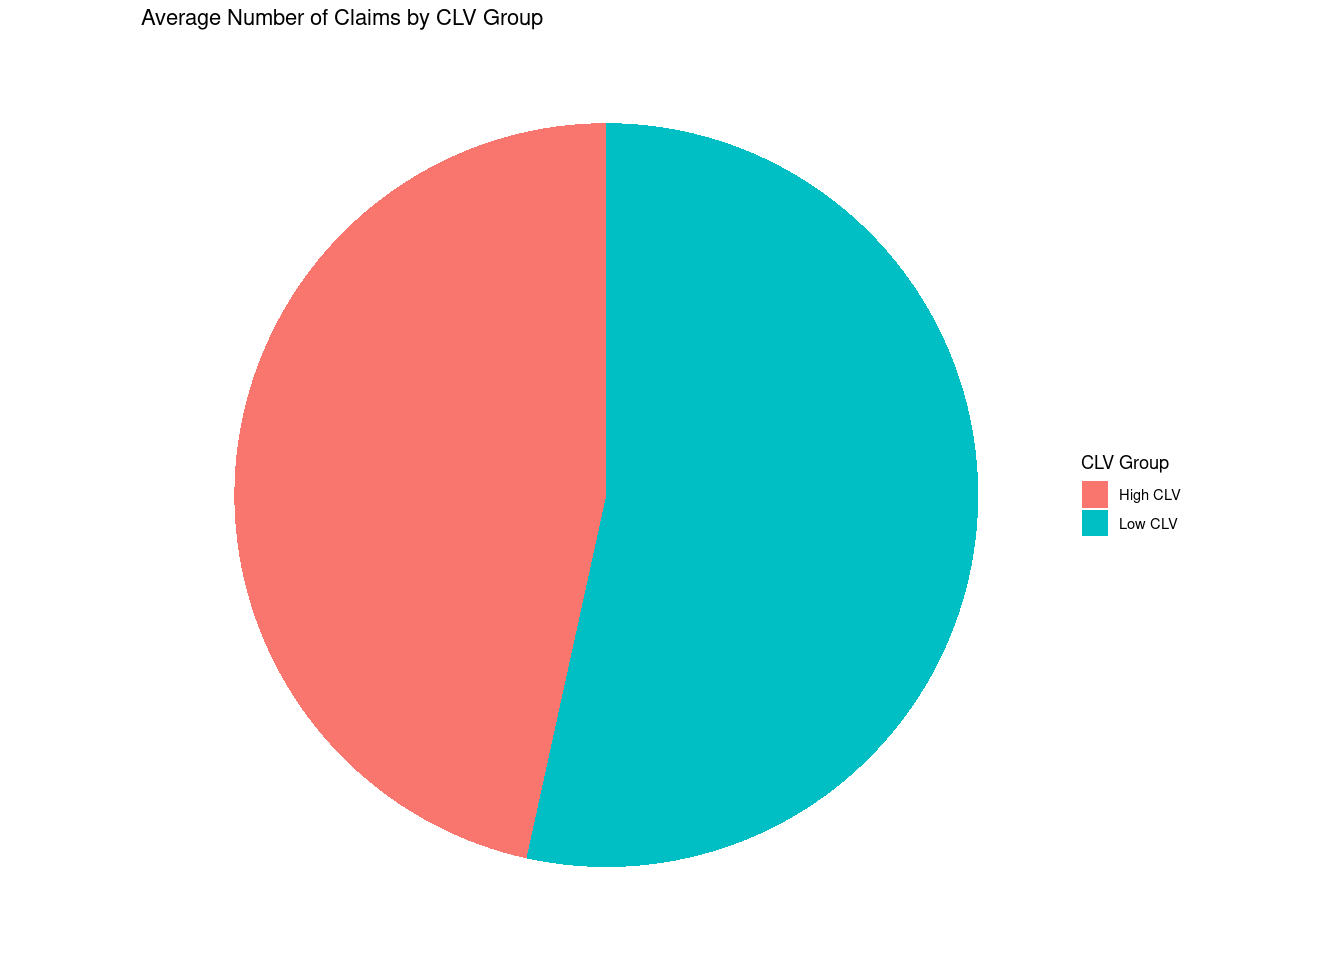

In [51]:
# Classifying customers as high or low CLV
claims_df <- claims_df %>%
  mutate(clv_group = ifelse(customer_lifetime_value > median(claims_df$customer_lifetime_value), "High CLV", "Low CLV"))

# Average number of claims for each CLV group
claims_summary <- claims_df %>%
  group_by(clv_group) %>%
  summarise(avg_claims = mean(total_claims))

print(claims_summary)

ggplot(claims_summary, aes(x = "", y = avg_claims, fill = clv_group)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  labs(title = "Average Number of Claims by CLV Group",
       fill = "CLV Group",
       y = NULL) +
  theme_void() +
  theme(legend.position = "right")

# Executive Summary (20 Points)

Write an executive summary of your overall findings and recommendations to the executives at this company. Think of this section as your closing remarks of a presentation, where you summarize your key findings and make recommendations to improve pricing, company operations, and car insurance policy adjustments.

Your executive summary must be written in a [professional tone](https://www.universalclass.com/articles/writing/business-writing/appropriate-tone-in-business-communications.htm), with minimal grammatical errors, and should include the following sections:

1.  An introduction where you explain the business problem and goals of your data analysis

- What problem(s) is this company trying to solve? Why are they important to their future success?
- What was the goal of your analysis? What questions were you trying to answer and why do they matter?

<br>

2.  Highlights and key findings from your Exploratory Data Analysis section

- What were the interesting findings from your analysis and **why are they important for the business**?
	- Note: **Do not list all your questions and answers from the exploratory analysis section**. You should summarize the findings and list them in order by their potential business impact 
- This section is meant to **establish the need for your recommendations** in the following section

<br>

3.  Your recommendations to the company

- Each recommendation must be supported by your data analysis results
- You must clearly explain **why** you are making each recommendation and which results from your data analysis support this recommendation
- You must also describe the potential business impact of your recommendation:
	- Why is this a good recommendation?
	- What benefits will the business achieve?

**Please add you executive summary in the text block below**.

## Introduction
Auto insurance companies provide financial protection to vehicle owners against losses resulting from accidents, theft, and other unexpected events involving their vehicles offering security through policy coverage. In this project, the insurance company has noticed a decline in their profitability over the last few years and this is a concerning issue as this could lead the company to loss. Our goal here was to conduct a thorough exploratory data analysis to determine what factors are affecting the profitability of the company and also recommend required changes to the executive team.


## Key Findings
Addressing issues with high claim rate customers with low lifetime values can significantly mitigate losses and improve overall profitability. Recognizing the correlation between premium coverage and higher customer lifetime values presents opportunities for upselling and tailoring policies to maximize profitability. Targeting luxury vehicle owners, who demonstrate higher lifetime values, can enhance profitability through tailored products and services. Optimizing agent-driven sales channels and adapting customer service strategies based on claim amount variances across channels can improve overall profitability. Implementing premium pricing strategies to attract customers with higher lifetime values can lead to sustained profitability. Understanding the relationship between claim frequency and customer lifetime value enables better segmentation and risk management practices and helps in adjusting pricing strategies. These strategic actions can position our company for sustainable growth in the near future.


## Recommendations
Start specialized risk management programs for customers with high claim rates and low lifetime values to increase profitability. Take advantage of the relationship that has been identified between higher customer lifetime values and premium coverage to motivate focused upselling efforts and create a variety of revenue streams. Create customized insurance products designed specifically for owners of high-end vehicles to take advantage of their increased lifetime value and reinforce their market position. Enhance client acquisition, retention, and lifetime value through agent-centric sales channel optimization to promote long-term profitability. Use smart premium pricing strategies to draw in and keep customers with higher lifetime values, which will lead to long-term revenue growth. Optimize income streams while deftly managing risk exposure by utilizing information regarding claim frequency and client lifetime value to improve segmentation and pricing tactics. 